# Adam algorithm and Learning Rate Decay

Objectives:
- Show how Adam algorithm can make the model converge faster and decrease the oscilations on the cost.
- Show how Learning Rate Decay can help to better tune the learning rate along the training, which leads to smaller cost values.

In [1]:
import numpy as np
import neural_networks
from sklearn.datasets import  make_moons
import matplotlib.pyplot as plt
import math

## Data to Classify

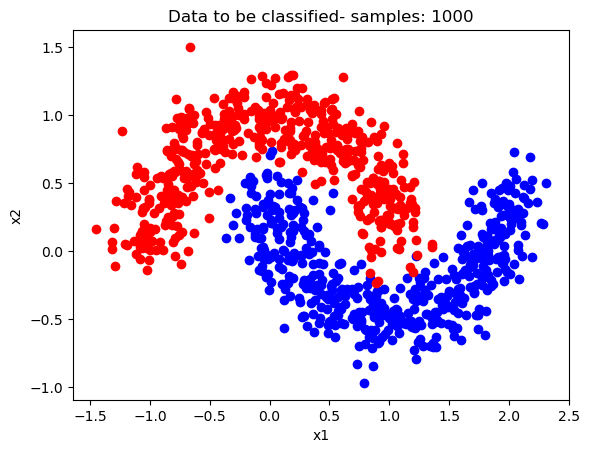

In [2]:
#Data:
# Create a datapoints using skilearn make_moons function
x, y = make_moons(n_samples=1000, shuffle=True, noise=.15, random_state=1)

# Create a scatter plot with a red dashed line
plt.scatter(x[y==1][:,0], x[y==1][:,1], color='blue', marker='o')
plt.scatter(x[y==0][:,0], x[y==0][:,1], color='red', marker='o')
# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data to be classified- samples: 1000')
plt.show()

In [3]:
x = x.T
y = y.reshape((1,-1))

# Set 90% to train dataset:
x_train = x[:,0:int(y.shape[1]*.9)]
y_train = y[:,0:int(y.shape[1]*.9)]
# Set 10% to test dataset:
x_test = x[:,int(y.shape[1]*.9):]
y_test = y[:,int(y.shape[1]*.9):]

## Train Neural Network

### Train model using Gradient Descent Algorithm

In [126]:
#01 Create Hidden Layers:

l_1 = neural_networks.NN_Layer(layer='l1', units=64, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
l_2 = neural_networks.NN_Layer(layer='l2', units=128, activation_func='relu')
l_3 = neural_networks.NN_Layer(layer='l3', units=200, activation_func='relu')
l_4 = neural_networks.NN_Layer(layer='l4', units=128, activation_func='relu')
l_5 = neural_networks.NN_Layer(layer='l5', units=1, activation_func='sigmoid') # Neural network layer with 1 units and sigmoid activation function.

#02 Create Model:
model_grad_desc = neural_networks.NN(hidden_layers=[l_1, l_2, l_3, l_4, l_5])

#03 Train Model:
model_grad_desc.train(
    features=x_train,                           # X vector, features
    labels=y_train,                             # Y vector, labels
    alpha=1e-1,                                 # Hyperparemeter-Learning rate
    decay_rate=0,                               # Hypterparemeter- To decrease alpha as training progresses. set =0, means to decay.
    optimization_algorithm='Gradient Descent',  # Optmization Algorithm
    nr_epochs=50,                               # Number of iterations of optimization through all the dataset
    batch_size=2**7,                            # Mini-batch size
    l2_regularization=True,                     # No regularization applied
    lambd=0.5,                                  # Regularization factor
    e=1e-10)

Epoch: 0 | Cost: 0.3589707088032612
Epoch: 10 | Cost: 0.3065786584859518
Epoch: 20 | Cost: 0.3033103180289342
Epoch: 30 | Cost: 0.3003142969079913
Epoch: 40 | Cost: 0.2973896034442333


### Train model using Adam Algorithm

In [25]:
#01 Create Hidden Layers:

l1 = neural_networks.NN_Layer(layer='l1', units=64, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
l2 = neural_networks.NN_Layer(layer='l2', units=128, activation_func='relu')
l3 = neural_networks.NN_Layer(layer='l3', units=200, activation_func='relu')
l4 = neural_networks.NN_Layer(layer='l4', units=128, activation_func='relu')
l5 = neural_networks.NN_Layer(layer='l5', units=1, activation_func='sigmoid') # Neural network layer with 1 units and sigmoid activation function.

#02 Create Model:
model_adam = neural_networks.NN(hidden_layers=[l1, l2, l3, l4, l5])

#03 Train Model:

model_adam.train(
    features=x_train,               # X vector, features
    labels=y_train,                 # Y vector, labels
    alpha=1e-2,                     # Hyperparameter- Learning rate
    optimization_algorithm='Adam',  # Optimization algorithm used to minimize cost function.
    decay_rate=0,                   # Hypterparemeter- To decrease alpha as training progresses. set =0, means to decay.
    beta1=0.7,                      # Hyperparameter- Momentum in Adam
    beta2=0.85,                     # Hyperparameter- RMSprop in Adam
    nr_epochs=50,                   # Number of iterations of optimization through all the dataset
    batch_size=2**7,                #  batch size
    l2_regularization=True,         # No regularization applied
    lambd=0.5,                      # Hyperparemeter- Regularization factor
    e=1e-10)


Epoch: 0 | Cost: 0.3535076911155412
Epoch: 10 | Cost: 0.06966321411201928
Epoch: 20 | Cost: 0.02620936234089342
Epoch: 30 | Cost: 0.02082829859500982
Epoch: 40 | Cost: 0.016976131253677817


### Plot Cost over each iteration of update on w,b

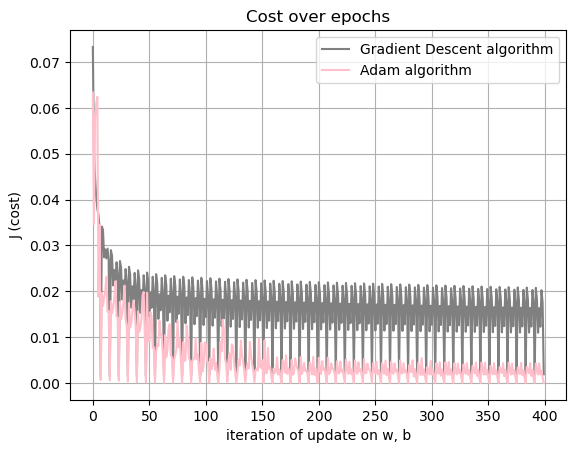

In [127]:

# Plot results - Mini-Batch:
plt.plot(np.arange(0,len(model_grad_desc.cost), 1), 
         model_grad_desc.cost, 
         color='grey', label='Gradient Descent algorithm')  

# Plot result - Mini-Batch:
plt.plot(np.arange(0,len(model_adam.cost), 1), 
         model_adam.cost, 
         color='pink', label='Adam algorithm')  
# Add labels and title
plt.xlabel('iteration of update on w, b')
plt.ylabel('J (cost)')
plt.title('Cost over epochs')
plt.legend()
plt.grid(True)
plt.show()

As shown above, when using Adam Algorithm:
- the optimization will converge faster;
- the cost decrease will have smaller oscilation over the model training on each mini-batch of data. 

### Train model using Learning Rate Decay

In [134]:
#01 Create Hidden Layers:

layer_1 = neural_networks.NN_Layer(layer='l1', units=64, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
layer_2 = neural_networks.NN_Layer(layer='l2', units=128, activation_func='relu')
layer_3 = neural_networks.NN_Layer(layer='l3', units=200, activation_func='relu')
layer_4 = neural_networks.NN_Layer(layer='l4', units=128, activation_func='relu')
layer_5 = neural_networks.NN_Layer(layer='l5', units=1, activation_func='sigmoid') # Neural network layer with 1 units and sigmoid activation function.

#02 Create Model:
model_grad_desc_v2 = neural_networks.NN(hidden_layers=[layer_1, layer_2, layer_3, layer_4, layer_5])

#03 Train Model:
model_grad_desc_v2.train(
    features=x_train,                           # X vector, features
    labels=y_train,                             # Y vector, labels
    alpha=1e-1,                                 # Hyperparemeter-Learning rate
    decay_rate=0.001,                               # Hypterparemeter- To decrease alpha as training progresses. set =0, means to decay.
    optimization_algorithm='Gradient Descent',  # Optmization Algorithm
    nr_epochs=1000,                               # Number of iterations of optimization through all the dataset
    batch_size=2**7,                            # Mini-batch size
    l2_regularization=True,                     # No regularization applied
    lambd=0.5,                                  # Regularization factor
    e=1e-10)

Epoch: 0 | Cost: 0.34156163440750537
Epoch: 10 | Cost: 0.3078713431996957
Epoch: 20 | Cost: 0.30438050744374245
Epoch: 30 | Cost: 0.3013699954351294
Epoch: 40 | Cost: 0.2985024120682075
Epoch: 50 | Cost: 0.2957354303304719
Epoch: 60 | Cost: 0.29303771054312167
Epoch: 70 | Cost: 0.29040653902351793
Epoch: 80 | Cost: 0.28783353440403797
Epoch: 90 | Cost: 0.28530770770168956
Epoch: 100 | Cost: 0.2828144043193586
Epoch: 110 | Cost: 0.2803549317783979
Epoch: 120 | Cost: 0.27793393557412505
Epoch: 130 | Cost: 0.275545313949467
Epoch: 140 | Cost: 0.2731805894388481
Epoch: 150 | Cost: 0.27084641811092247
Epoch: 160 | Cost: 0.2685342552423727
Epoch: 170 | Cost: 0.2662324801613601
Epoch: 180 | Cost: 0.26396808243623887
Epoch: 190 | Cost: 0.26173086471251206
Epoch: 200 | Cost: 0.2595401370689131
Epoch: 210 | Cost: 0.2573823421354503
Epoch: 220 | Cost: 0.25527019766077486
Epoch: 230 | Cost: 0.25319885065925923
Epoch: 240 | Cost: 0.2511578646524992
Epoch: 250 | Cost: 0.2491576091414001
Epoch: 260 |

In [118]:
#01 Create Hidden Layers:

h_l1 = neural_networks.NN_Layer(layer='l1', units=64, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
h_l2 = neural_networks.NN_Layer(layer='l2', units=128, activation_func='relu')
h_l3 = neural_networks.NN_Layer(layer='l3', units=200, activation_func='relu')
h_l4 = neural_networks.NN_Layer(layer='l4', units=128, activation_func='relu')
h_l5 = neural_networks.NN_Layer(layer='l5', units=1, activation_func='sigmoid') # Neural network layer with 1 units and sigmoid activation function.

#02 Create Model:
model_adam_v2 = neural_networks.NN(hidden_layers=[h_l1, h_l2, h_l3, h_l4, h_l5])

#03 Train Model:

model_adam_v2.train(
    features=x_train,               # X vector, features
    labels=y_train,                 # Y vector, labels
    alpha=1e-2,                     # Hyperparameter- Learning rate
    optimization_algorithm='Adam',  # Optimization algorithm used to minimize cost function.
    decay_rate=.2,                   # Hypterparemeter- To decrease alpha as training progresses. set =0, means to decay.
    beta1=0.7,                      # Hyperparameter- Momentum in Adam
    beta2=0.85,                     # Hyperparameter- RMSprop in Adam
    nr_epochs=1000,                   # Number of iterations of optimization through all the dataset
    batch_size=2**7,                #  batch size
    l2_regularization=True,         # No regularization applied
    lambd=0.5,                      # Hyperparemeter- Regularization factor
    e=1e-10)


Epoch: 0 | Cost: 0.3424459355772227
Epoch: 10 | Cost: 0.11371179276024312
Epoch: 20 | Cost: 0.05118622199205731
Epoch: 30 | Cost: 0.04103696940977048
Epoch: 40 | Cost: 0.03496508255130895
Epoch: 50 | Cost: 0.03145914602299288
Epoch: 60 | Cost: 0.028981566119958228
Epoch: 70 | Cost: 0.027168222233791613
Epoch: 80 | Cost: 0.025766675069912037
Epoch: 90 | Cost: 0.024625002353758852
Epoch: 100 | Cost: 0.02368086094001285
Epoch: 110 | Cost: 0.02288865719724886
Epoch: 120 | Cost: 0.022235017345628924
Epoch: 130 | Cost: 0.02163890581541216
Epoch: 140 | Cost: 0.021150126165229922
Epoch: 150 | Cost: 0.02068691197280629
Epoch: 160 | Cost: 0.0202952259886836
Epoch: 170 | Cost: 0.01993369235247708
Epoch: 180 | Cost: 0.019595673031288854
Epoch: 190 | Cost: 0.019310296539915284
Epoch: 200 | Cost: 0.01903745930531773
Epoch: 210 | Cost: 0.01878626558676008
Epoch: 220 | Cost: 0.01855683086494849
Epoch: 230 | Cost: 0.018341189616585485
Epoch: 240 | Cost: 0.018145339620571865
Epoch: 250 | Cost: 0.0179569

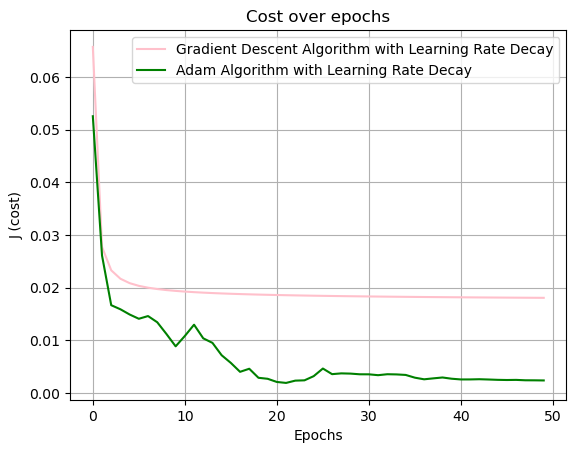

In [119]:

# Plot the Cost over each epoch:

# Get the cost after each full epoch:
batch_size = 2**7
number_batches = math.ceil(y_train.shape[1]/batch_size)
#cost_batch=[]
cost_grad_desc = []
cost_adam = []
for i in range(0,50):
    #02- Mini-Batch Gradient Descent model:
    cost_grad_desc.append(model_grad_desc_v2.cost[i*number_batches])
    cost_adam.append(model_adam_v2.cost[i*number_batches])

# Plot results - Batch:
plt.plot(np.arange(0,50, 1), 
         cost_grad_desc, 
         color='pink', label='Gradient Descent Algorithm with Learning Rate Decay')  

# Plot result - Mini-Batch:
plt.plot(np.arange(0,50, 1), 
         cost_adam, 
         color='green', label='Adam Algorithm with Learning Rate Decay')  
# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('J (cost)')
plt.title('Cost over epochs')
plt.legend()
plt.grid(True)
plt.show()

By using learning rate decay the learning rate (alpha) is progressivelly decreased the the training advances and the model gets closer to converge.<br>
Smaller learning rate allows the model to take smaller steps with it get closer to the minimum and avoid the optimization to be bouncing around. 

### Plot Decision Boundery

In [121]:
#- Generate points to form the decision boundary:
x1_min, x1_max = x[0,:].min(), x[0,:].max() 
x2_min, x2_max = x[1,:].min(), x[1,:].max()
x1, x2= np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                    np.linspace(x2_min, x2_max, 1000))
x_grid = np.c_[x1.ravel(), x2.ravel()].T

In [128]:
#- Predict usinging the trained model:
y_hat_grad_desc = model_grad_desc.predict(x_grid)
y_hat_adam = model_adam.predict(x_grid)

In [135]:
y_hat_grad_desc_v2 = model_grad_desc_v2.predict(x_grid)
y_hat_adam_v2 = model_adam_v2.predict(x_grid)

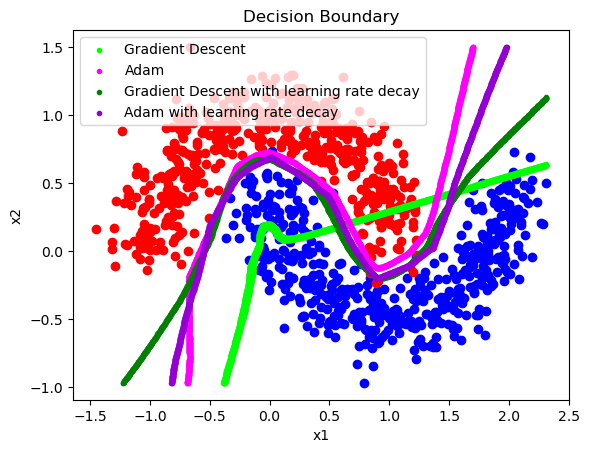

In [136]:

#- Plot results:

#-Plot data
plt.scatter(x[:, (y == 1).reshape(-1)][0, :],
            x[:, (y == 1).reshape(-1)][1, :], color='blue', marker='o')
plt.scatter(x[:, (y == 0).reshape(-1)][0, :],
            x[:, (y == 0).reshape(-1)][1, :], color='red', marker='o')

#- Plot decision boundary:
plt.scatter(x_grid[:, np.logical_and(y_hat_grad_desc >= 0.49, y_hat_grad_desc <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_grad_desc >= 0.49, y_hat_grad_desc <= 0.51).reshape(-1)][1, :], color='lime', marker='.',  
            label='Gradient Descent')

plt.scatter(x_grid[:, np.logical_and(y_hat_adam >= 0.49, y_hat_adam <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_adam >= 0.49, y_hat_adam <= 0.51).reshape(-1)][1, :], color='magenta', marker='.', 
            label='Adam')

plt.scatter(x_grid[:, np.logical_and(y_hat_grad_desc_v2 >= 0.49, y_hat_grad_desc_v2 <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_grad_desc_v2 >= 0.49, y_hat_grad_desc_v2 <= 0.51).reshape(-1)][1, :], color='green', marker='.',  
            label='Gradient Descent with learning rate decay')

plt.scatter(x_grid[:, np.logical_and(y_hat_adam_v2 >= 0.49, y_hat_adam_v2 <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_adam_v2 >= 0.49, y_hat_adam_v2 <= 0.51).reshape(-1)][1, :], color='darkviolet', marker='.', 
            label='Adam with learning rate decay')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.legend()
plt.show()

Adam algorithm achives a great performance with very little training iterations, while gradient descent needs much more iterations to learn from the data.<br>
Learning Rate Decay makes Adam even better when the model needs more training iterations.<br>
Learing Rate decay is also very handy to Gradient Descent to adapt the learning rate to small number as the training progress.<br>



Author:<br>
Emerson Goncalves